In [1]:

import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout, Activation 
from keras.utils import np_utils
from pandas import read_csv
from sklearn.model_selection import train_test_split

4423680/4422102 [==============================] - 0s 0us/step


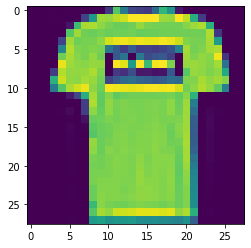

In [2]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
plt.imshow(x_train[1])

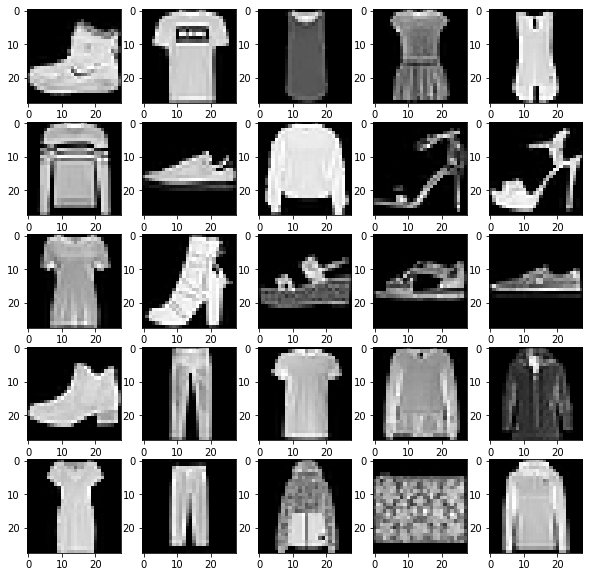

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
         plt.subplot(5,5,i+1)
         plt.imshow(x_train[i],cmap='gray')
plt.show()

In [4]:
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
 # Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.
 # Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1,28,28,1]), x_test.reshape([-1,28,28,1])


In [5]:
y_train=np_utils.to_categorical(y_train)
class_name=['T-shirt/top','Trouser/pants','Pullover','Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle boot']
print(x_train.shape,y_train.shape)


(60000, 28, 28, 1) (60000, 10)


In [6]:
model = Sequential()

model.add(Convolution2D(32, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(32, (5,5), activation='relu'))
model.add(Convolution2D(8, (5,5), activation='relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=256,
                 shuffle=True,
                 validation_split=0.20)


Epoch 1/10
188/188 [==============================] - 180s 874ms/step - loss: 1.1705 - accuracy: 0.5742 - val_loss: 0.5207 - val_accuracy: 0.8192
Epoch 2/10
188/188 [==============================] - 164s 873ms/step - loss: 0.4528 - accuracy: 0.8378 - val_loss: 0.3944 - val_accuracy: 0.8610
Epoch 3/10
188/188 [==============================] - 164s 873ms/step - loss: 0.3738 - accuracy: 0.8675 - val_loss: 0.3933 - val_accuracy: 0.8680
Epoch 4/10
188/188 [==============================] - 164s 875ms/step - loss: 0.3289 - accuracy: 0.8851 - val_loss: 0.3405 - val_accuracy: 0.8850
Epoch 5/10
188/188 [==============================] - 164s 871ms/step - loss: 0.3040 - accuracy: 0.8924 - val_loss: 0.3167 - val_accuracy: 0.8923
Epoch 6/10
188/188 [==============================] - 164s 871ms/step - loss: 0.2869 - accuracy: 0.8966 - val_loss: 0.2987 - val_accuracy: 0.8986
Epoch 7/10
188/188 [==============================] - 163s 869ms/step - loss: 0.2727 - accuracy: 0.9023 - val_loss: 0.2889 -

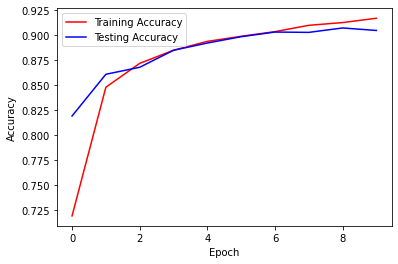

In [9]:
plt.figure()
plt.plot(hist.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], 'b', label='Testing Accuracy')
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()

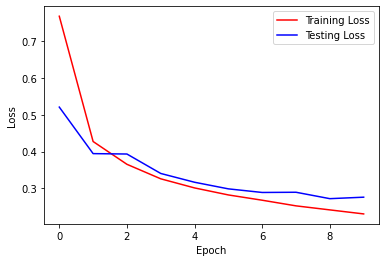

In [10]:
plt.figure()
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
p= model.predict(x_test[:10])
print(p)

[[3.83868291e-06 1.01143051e-07 3.23733548e-06 8.88788687e-09
  2.55100053e-06 2.85083689e-02 2.76927494e-06 2.64070891e-02
  2.53828075e-05 9.45046723e-01]
 [4.96632456e-05 4.81763436e-06 9.99482751e-01 2.73035880e-06
  2.24034215e-04 7.36948280e-09 2.34881474e-04 1.10603460e-09
  9.55124619e-07 2.13470642e-07]
 [1.09360954e-04 9.99585807e-01 2.33273184e-07 1.53474364e-04
  3.74052729e-06 1.30814526e-10 1.45162558e-04 3.01261828e-11
  2.24393671e-06 5.90977800e-09]
 [9.99918575e-06 9.99556839e-01 3.90892183e-07 3.90665489e-04
  2.51878391e-05 2.43819992e-10 1.60131585e-05 9.83587864e-11
  7.66044650e-07 1.23190746e-08]
 [1.40176192e-01 1.09729939e-04 2.20731925e-02 7.58710504e-03
  7.39182085e-02 2.11535212e-06 7.56061912e-01 4.80621729e-08
  7.02920879e-05 1.29854834e-06]
 [4.03881946e-04 9.97135758e-01 8.47632327e-06 2.66371615e-04
  3.87080254e-05 4.53564875e-09 2.02594907e-03 2.23629937e-09
  1.20847923e-04 5.43782122e-08]
 [1.58469629e-04 8.40550230e-04 2.44978499e-02 1.64989506e

In [12]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [13]:
model.save('CNN_model1.h5')